In [5]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import tqdm
from multiprocess import Pool
from pandas import DataFrame as df
from os.path import join
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dirname = "../abc/beem"
frames_list = [filename for filename in os.listdir(dirname) if filename.endswith(".aig")]
max_pool = 12

        
def process_aig(f):
    os.system("cd ../abc && ./abc -c \"r " + os.path.join("beem", f) + "; dprove\"")
    return f

with Pool(max_pool) as p:
    pool_outputs = list(
        tqdm.tqdm(
            p.imap(process_aig,
                   frames_list),
            total=len(frames_list)
        )
    )

100%|██████████| 688/688 [1:03:49<00:00,  5.57s/it]  


In [3]:
dirname = "../abc/beem"
file_list = [filename for filename in os.listdir(dirname) if filename.endswith(".csv")]
max_pool = 12

def process_file(file):
    x = pd.read_csv(join(dirname, file))
    x['avg_depth'] = x.groupby('level')['depth'].transform('mean')
    x['max_depth'] = x.groupby('level')['depth'].transform('max')
    x.drop_duplicates(subset=['level'], keep='first')
    return x
    
with Pool(max_pool) as p:
    pool_outputs = list(
        tqdm.tqdm(
            p.imap(process_file,
                   file_list),
            total=len(file_list)
        )
    )
tot = pd.concat(pool_outputs)
tot

100%|██████████| 662/662 [00:00<00:00, 749.67it/s]


,level,cube,depth,avg_depth,max_depth
0,1,0x7fffd71284d0,1,1.0,1
1,1,0x7fffd72500c0,1,1.0,1
2,2,0x7fffd7254ec0,2,2.0,2
3,2,0x7fffd7820af0,2,2.0,2
4,3,0x7fffd7820af0,4,4.0,4
...,...,...,...,...,...
30,17,0x7ffff59da710,151,151.0,151
31,18,0x7ffff59da710,151,151.0,151
32,20,0x7ffff94e1450,219,219.0,219
33,22,0x7ffff952aa40,219,219.0,219


<AxesSubplot:xlabel='level', ylabel='avg_depth'>

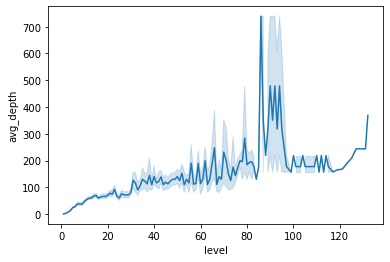

In [9]:
sns.lineplot(data=tot, x="level", y="avg_depth")